In [13]:
import pandas as pd

observation = pd.read_csv("observations.csv")
print(observation.describe(include = "all"))

species = pd.read_csv("species_info.csv")
print(species.describe(include = "all"))

# Through this analysis we see that theres only 191 species that has conservation status which means the others are not in any danger at all
# We see 7 categories of species with Vascular Plant being the most common
# By far birds are the most endangered species
# Four different parks
# No nan park names
# Alot of null values for conservation status meaning that alot of animals arent in a negative status
# Only 191 animals had a non negative conservation analysis
# If we consider only the animals with non null conservation status then there only 191 with bird being the most common

          scientific_name                  park_name  observations
count               23296                      23296  23296.000000
unique               5541                          4           NaN
top     Castor canadensis  Yellowstone National Park           NaN
freq                   12                       5824           NaN
mean                  NaN                        NaN    142.287904
std                   NaN                        NaN     69.890532
min                   NaN                        NaN      9.000000
25%                   NaN                        NaN     86.000000
50%                   NaN                        NaN    124.000000
75%                   NaN                        NaN    195.000000
max                   NaN                        NaN    321.000000
              category scientific_name   common_names conservation_status
count             5824            5824           5824                 191
unique               7            5541          

In [24]:
print(species.category.value_counts())
endangered_species = species.dropna()
print(endangered_species.describe())
print(endangered_species.category.value_counts())


Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64
       category   scientific_name     common_names conservation_status
count       191               191              191                 191
unique        7               179              190                   4
top        Bird  Myotis lucifugus  Gray Wolf, Wolf  Species of Concern
freq         79                 3                2                 161
Bird                 79
Vascular Plant       46
Mammal               38
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64


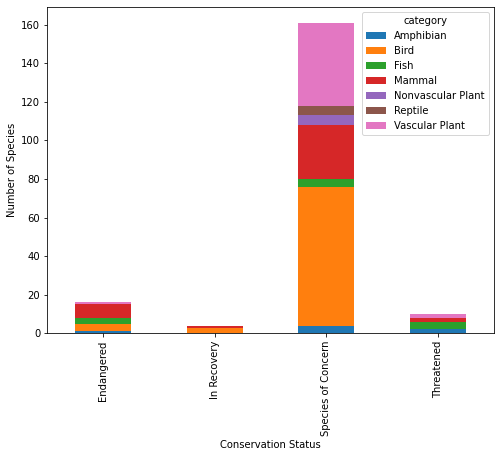

In [34]:
conservationCategory = species[species.conservation_status != None]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

In [25]:
cat_con = pd.crosstab(endangered_species.category, endangered_species.conservation_status)
print(cat_con)
# Mammal have the most endangered, Mabe havent recovered yet

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2


In [32]:
from scipy.stats import chi2_contingency
import numpy as np


# Created Contigency table and used chi2 contigency library to see if variables are related
# This time the p-value is less then 0.05 which means that the difference between the animals is significant in terms of there relationship with conservation status

cc_prop = cat_con/len(endangered_species)
print(cc_prop)

conservative_marginal = cc_prop.sum(axis=0)
print(conservative_marginal)
category_marginal = cc_prop.sum(axis=1)
print(category_marginal)


chi2, pval, dof, expected = chi2_contingency(cat_con)
print(expected)
print(chi2)
print(pval)


conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian              0.005236     0.000000            0.020942    0.010471
Bird                   0.020942     0.015707            0.376963    0.000000
Fish                   0.015707     0.000000            0.020942    0.020942
Mammal                 0.036649     0.005236            0.146597    0.010471
Nonvascular Plant      0.000000     0.000000            0.026178    0.000000
Reptile                0.000000     0.000000            0.026178    0.000000
Vascular Plant         0.005236     0.000000            0.225131    0.010471
conservation_status
Endangered            0.083770
In Recovery           0.020942
Species of Concern    0.842932
Threatened            0.052356
dtype: float64
category
Amphibian            0.036649
Bird                 0.413613
Fish                 0.057592
Mammal               0.198953
Nonvascular Plant  